In [25]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\mo223\\Desktop\\big contest\\big_con_data'

In [3]:
# sk 유동인구 파일 로드
os.chdir('./sk')
files_sk = os.listdir()

sk = pd.DataFrame()

for file in files_sk[:8]:
    temp = pd.read_csv(file, sep="|")
    
    sk = sk.append(temp)

In [4]:
sk.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


In [5]:
# cj 물류 파일 로드
os.chdir("../cj")

cj = pd.read_excel('cj_data.xlsx')

In [6]:
cj.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [8]:
os.chdir("../")
# os.getcwd()

date_table = pd.read_csv('date_table.csv')

In [9]:
date_table.head()

,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,2019,2,1,4,4,금
1,20190202,2019,2,2,4,5,토
2,20190203,2019,2,3,5,6,일
3,20190204,2019,2,4,5,0,월
4,20190205,2019,2,5,5,1,화


In [10]:
# sk 데이터 년 / 월 / 일 / 주차 / 요일 합치기
sk = sk.merge(date_table, how='left', left_on = 'STD_YMD', right_on = 'STD_DD')

# 일자 양식맞추기
cj['DL_YMD'] = cj['DL_YMD'] + 20000000

# cj 데이터 년 / 월 / 일 / 주차 / 요일 합치기
cj = cj.merge(date_table, how='left', left_on = 'DL_YMD', right_on = 'STD_DD')

In [11]:
sk.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,5757.53,3359.85,4431.71,20190201,2019,2,1,4,4,금
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,3838.77,2453.97,3207.26,20190202,2019,2,2,4,5,토
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,2484.98,1511.67,1954.98,20190203,2019,2,3,5,6,일
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,2164.35,1230.21,1520.35,20190204,2019,2,4,5,0,월
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,3265.62,1692.74,2147.09,20190205,2019,2,5,5,1,화


In [12]:
cj.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,20190201,2019,2,1,4,4,금
1,20190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,20190201,2019,2,1,4,4,금
2,20190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,20190201,2019,2,1,4,4,금
3,20190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,20190201,2019,2,1,4,4,금
4,20190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,20190201,2019,2,1,4,4,금


In [14]:
# dong 정보 추출
dong_info  = cj[['CTPV_NM', 'CTGG_NM', 'HDNG_NM']].drop_duplicates()

# sk데이터에 동 정보 삽입
sk = sk.merge(dong_info, how='left', left_on = "HDONG_NM", right_on = "HDNG_NM")

In [15]:
# sk, cj 2019년 / 2020년 데이터 분리
sk_2019 = sk[sk['year'] == 2019]
sk_2020 = sk[sk['year'] == 2020]
cj_2019 = cj[cj['year'] == 2019]
cj_2020 = cj[cj['year'] == 2020]

In [16]:
# sk. cj 각 년도별 서울 / 대구 데이터 분리
sk_2019_seoul = sk_2019[sk_2019['CTPV_NM'] == '서울특별시']
sk_2020_seoul = sk_2020[sk_2020['CTPV_NM'] == '서울특별시']
sk_2019_daegu = sk_2019[sk_2019['CTPV_NM'] == '대구광역시']
sk_2020_daegu = sk_2020[sk_2020['CTPV_NM'] == '대구광역시']

cj_2019_seoul = cj_2019[cj_2019['CTPV_NM'] == "서울특별시"]
cj_2020_seoul = cj_2020[cj_2020['CTPV_NM'] == '서울특별시']
cj_2019_daegu = cj_2019[cj_2019['CTPV_NM'] == "대구광역시"]
cj_2020_daegu = cj_2020[cj_2020['CTPV_NM'] == '대구광역시']             

In [20]:
flow_columns = ['MAN_FLOW_POP_CNT_0004',
       'MAN_FLOW_POP_CNT_0509', 'MAN_FLOW_POP_CNT_1014',
       'MAN_FLOW_POP_CNT_1519', 'MAN_FLOW_POP_CNT_2024',
       'MAN_FLOW_POP_CNT_2529', 'MAN_FLOW_POP_CNT_3034',
       'MAN_FLOW_POP_CNT_3539', 'MAN_FLOW_POP_CNT_4044',
       'MAN_FLOW_POP_CNT_4549', 'MAN_FLOW_POP_CNT_5054',
       'MAN_FLOW_POP_CNT_5559', 'MAN_FLOW_POP_CNT_6064',
       'MAN_FLOW_POP_CNT_6569', 'MAN_FLOW_POP_CNT_70U',
       'WMAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0509',
       'WMAN_FLOW_POP_CNT_1014', 'WMAN_FLOW_POP_CNT_1519',
       'WMAN_FLOW_POP_CNT_2024', 'WMAN_FLOW_POP_CNT_2529',
       'WMAN_FLOW_POP_CNT_3034', 'WMAN_FLOW_POP_CNT_3539',
       'WMAN_FLOW_POP_CNT_4044', 'WMAN_FLOW_POP_CNT_4549',
       'WMAN_FLOW_POP_CNT_5054', 'WMAN_FLOW_POP_CNT_5559',
       'WMAN_FLOW_POP_CNT_6064', 'WMAN_FLOW_POP_CNT_6569',
       'WMAN_FLOW_POP_CNT_70U']

In [30]:
# 2019/2020년 서울/대구의 유동인구 총 량
sk_2019_seoul['flow_sum'] = sk_2019_seoul[flow_columns].sum(axis=1)
sk_2020_seoul['flow_sum'] = sk_2020_seoul[flow_columns].sum(axis=1)
sk_2019_daegu['flow_sum'] = sk_2019_daegu[flow_columns].sum(axis=1)
sk_2020_daegu['flow_sum'] = sk_2020_daegu[flow_columns].sum(axis=1)
flow_2019_sum_seoul = sk_2019_seoul['flow_sum'].sum()
flow_2020_sum_seoul = sk_2020_seoul['flow_sum'].sum()
flow_2019_sum_daegu = sk_2019_daegu['flow_sum'].sum()
flow_2020_sum_daegu = sk_2020_daegu['flow_sum'].sum()

# 2019/2020년 서울/대구의 물류 총 량 
dist_2019_sum_seoul = cj_2019_seoul['INVC_CONT'].sum()
dist_2020_sum_seoul = cj_2020_seoul['INVC_CONT'].sum()
dist_2019_sum_daegu = cj_2019_daegu['INVC_CONT'].sum()
dist_2020_sum_daegu = cj_2020_daegu['INVC_CONT'].sum()

In [32]:
# 각 년도별 서울 / 대구 유동인구 총 량으로 나누어 수치 보정
sk_2019_seoul['flow_sum'] = sk_2019_seoul['flow_sum'] / flow_2019_sum_seoul
sk_2020_seoul['flow_sum'] = sk_2020_seoul['flow_sum'] / flow_2020_sum_seoul
sk_2019_daegu['flow_sum'] = sk_2019_daegu['flow_sum'] / flow_2019_sum_daegu
sk_2020_daegu['flow_sum'] = sk_2020_daegu['flow_sum'] / flow_2020_sum_daegu

# 각 년도별 서울 / 대구 유동인구 총 량으로 나누어 수치 보정
cj_2019_seoul['INVC_CONT'] = cj_2019_seoul['INVC_CONT'] / dist_2019_sum_seoul
cj_2020_seoul['INVC_CONT'] = cj_2020_seoul['INVC_CONT'] / dist_2020_sum_seoul
cj_2019_daegu['INVC_CONT'] = cj_2019_daegu['INVC_CONT'] / dist_2019_sum_daegu
cj_2020_daegu['INVC_CONT'] = cj_2020_daegu['INVC_CONT'] / dist_2020_sum_daegu

In [52]:
# 소비 위축이 두드러지게 나타냈던 7, 8, 9, 10주차의 유동인구량
sk_2019_seoul_decrease = pd.DataFrame()
sk_2020_seoul_decrease = pd.DataFrame()
sk_2019_daegu_decrease = pd.DataFrame()
sk_2020_daegu_decrease = pd.DataFrame()

for week in range(7,11):
    temp_2019_seoul = sk_2019_seoul[sk_2019_seoul['week_num'] == week]
    temp_2020_seoul = sk_2020_seoul[sk_2020_seoul['week_num'] == week]
    temp_2019_daegu = sk_2019_daegu[sk_2019_daegu['week_num'] == week]
    temp_2020_daegu = sk_2020_daegu[sk_2020_daegu['week_num'] == week]
    sk_2019_seoul_decrease = sk_2019_seoul_decrease.append(temp_2019_seoul)
    sk_2020_seoul_decrease = sk_2020_seoul_decrease.append(temp_2020_seoul)
    sk_2019_daegu_decrease = sk_2019_daegu_decrease.append(temp_2019_daegu)
    sk_2020_daegu_decrease = sk_2020_daegu_decrease.append(temp_2020_daegu)

# 소비 위축이 두드러지게 나타났던 7, 8, 9, 10주차의 물류량
cj_2019_seoul_decrease = pd.DataFrame()
cj_2020_seoul_decrease = pd.DataFrame()
cj_2019_daegu_decrease = pd.DataFrame()
cj_2020_daegu_decrease = pd.DataFrame()

for week in range(7,11):
    temp_2019_seoul = cj_2019_seoul[cj_2019_seoul['week_num'] == week]
    temp_2020_seoul = cj_2020_seoul[cj_2020_seoul['week_num'] == week]
    temp_2019_daegu = cj_2019_daegu[cj_2019_daegu['week_num'] == week]
    temp_2020_daegu = cj_2020_daegu[cj_2020_daegu['week_num'] == week]
    cj_2019_seoul_decrease = cj_2019_seoul_decrease.append(temp_2019_seoul)
    cj_2020_seoul_decrease = cj_2020_seoul_decrease.append(temp_2020_seoul)
    cj_2019_daegu_decrease = cj_2019_daegu_decrease.append(temp_2019_daegu)
    cj_2020_daegu_decrease = cj_2020_daegu_decrease.append(temp_2020_daegu)

In [63]:
# 서울시/대구 전체(중구 + 노원구)의 2019/2020 총 유동인구량(7, 8, 9, 10주차)
flow_2019_total_seoul = sk_2019_seoul_decrease['flow_sum'].sum()
flow_2020_total_seoul = sk_2020_seoul_decrease['flow_sum'].sum()
flow_2019_total_daegu = sk_2019_daegu_decrease['flow_sum'].sum()
flow_2020_total_daegu = sk_2020_daegu_decrease['flow_sum'].sum()

# 서울시/대구 전체(중구 + 노원구)의 2019/2020 총 물류량(7, 8, 9, 10주차)
dist_2019_total_seoul = cj_2019_seoul_decrease['INVC_CONT'].sum()
dist_2020_total_seoul = cj_2020_seoul_decrease['INVC_CONT'].sum()
dist_2019_total_daegu = cj_2019_daegu_decrease['INVC_CONT'].sum()
dist_2020_total_daegu = cj_2020_daegu_decrease['INVC_CONT'].sum()

# 서울시/대구의 유동인구/물류 전체 지표

In [66]:
# 서울시 전체의 19년 대비 20년의 유동인구 감소지수(7, 8, 9, 10주차 기준)
# 산출식 = (2019년도 서울시 유동인구 총 량 - 2020년도 서울시 유동인구 총 량) / 2019년 서울시 유동인구 총 량
seoul_flow_index = (flow_2019_total_seoul - flow_2020_total_seoul) / flow_2019_total_seoul
seoul_flow_index

0.11189892920387084

In [67]:
# 대구광역시 전체의 19년 대비 20년의 유동인구 감소지수(7, 8, 9, 10주차 기준)
# 산출식 = (2019년도 대구광역시 유동인구 총 량 - 2020년도 대구광역시 유동인구 총 량) / 2019년 대구광역시 유동인구 총 량
daegu_flow_index = (flow_2019_total_daegu - flow_2020_total_daegu) / flow_2019_total_daegu
daegu_flow_index

0.17996142065767237

In [69]:
# 서울시 전체의 19년 대비 20년의 물류량 증가지수(7, 8, 9, 10주차 기준)
# 산출식 = (2020년도 서울시 물류 총 량 - 2019 물류년도 서울시 물류 총 량) / 2020년 서울시 물류 총 량
seoul_dist_index = (dist_2020_total_seoul - dist_2019_total_seoul) / dist_2020_total_seoul
seoul_dist_index

0.0008226538315532164

In [70]:
# 대구광역시 전체의 19년 대비 20년의 물류량 증가지수(7, 8, 9, 10주차 기준)
# 산출식 = (2020년도 대구광역시 물류 총 량 - 2019 물류년도 대구광역시 물류 총 량) / 2020년 대구광역시 물류 총 량
daegu_dist_index = (dist_2020_total_daegu - dist_2019_total_daegu) / dist_2020_total_daegu
daegu_dist_index

0.06570054532933595

# 서울시/대구의 유동인구/물류 행정동별 지표

In [75]:
# 서울시/대구시 행정동별 유동인구 변화량 테이블 생성
sk_2019_seoul_dong = sk_2019_seoul_decrease.pivot_table(index='HDNG_NM', values='flow_sum', aggfunc='sum')
sk_2020_seoul_dong = sk_2020_seoul_decrease.pivot_table(index='HDNG_NM', values='flow_sum', aggfunc='sum')
sk_2019_daegu_dong = sk_2019_daegu_decrease.pivot_table(index='HDNG_NM', values='flow_sum', aggfunc='sum')
sk_2020_daegu_dong = sk_2020_daegu_decrease.pivot_table(index='HDNG_NM', values='flow_sum', aggfunc='sum')

# 서울시/대구시 행정동별 물류 변화량 테이블 생성
cj_2019_seoul_dong = cj_2019_seoul_decrease.pivot_table(index='HDNG_NM', values='INVC_CONT', aggfunc='sum')
cj_2020_seoul_dong = cj_2020_seoul_decrease.pivot_table(index='HDNG_NM', values='INVC_CONT', aggfunc='sum')
cj_2019_daegu_dong = cj_2019_daegu_decrease.pivot_table(index='HDNG_NM', values='INVC_CONT', aggfunc='sum')
cj_2020_daegu_dong = cj_2020_daegu_decrease.pivot_table(index='HDNG_NM', values='INVC_CONT', aggfunc='sum')

In [78]:
# 서울시 행정동 별 유동인구 변화량 테이블 생성
# 산출식 = (각 행정동별)(2019년도 유동인구 총 량 - 2020년도 유동인구 총 량) / (2019년도 유동인구 총 량)
seoul_dong_flow_index = (sk_2019_seoul_dong - sk_2020_seoul_dong) / sk_2019_seoul_dong 

In [79]:
# 대구시 행정동 별 유동인구 변화량 테이블 생성
# 산출식 = (각 행정동별)(2019년도 유동인구 총 량 - 2020년도 유동인구 총 량) / (2019년도 유동인구 총 량)
daegu_dong_flow_index = (sk_2019_daegu_dong - sk_2020_daegu_dong) / sk_2019_daegu_dong 

In [85]:
# 서울시 행정동 별 물류 변화량 테이블 생성
# 산출식 = (각 행정동별)(2020년도 물류 총 량 - 2019년도 물류 총 량) / (2020년도 유동인구 총 량)
seoul_dong_dist_index = (cj_2020_seoul_dong - cj_2019_seoul_dong) / cj_2020_seoul_dong 

In [91]:
# 대구시 행정동 별 물류 변화량 테이블 생성
# 산출식 = (각 행정동별)(2020년도 물류 총 량 - 2019년도 물류 총 량) / (2020년도 유동인구 총 량)
daegu_dong_dist_index = (cj_2020_daegu_dong - cj_2019_daegu_dong) / cj_2020_daegu_dong 

In [108]:
# 서울시의 행정동별 유동인구 변화량 / 물류 변화량의 지표를 담고있는 테이블 생성
seoul_index_dic = {
    'flow_index' : seoul_dong_flow_index['flow_sum'],
    'dist_index' : seoul_dong_dist_index['INVC_CONT']
}
seoul_index = pd.DataFrame(seoul_index_dic)

# 대구시의 행정동별 유동인구 변화량 / 물류 변화량의 지표를 담고있는 테이블 생성
daegu_index_dic = {
    'flow_index' : daegu_dong_flow_index['flow_sum'],
    'dist_index' : daegu_dong_dist_index['INVC_CONT']
}
daegu_index = pd.DataFrame(daegu_index_dic)

In [111]:
# cj 물류 데이터에는 있지만 sk 유동인구 데이터에는 없는 신당제5동은 제거
seoul_index = seoul_index.drop('신당제5동', axis=0)

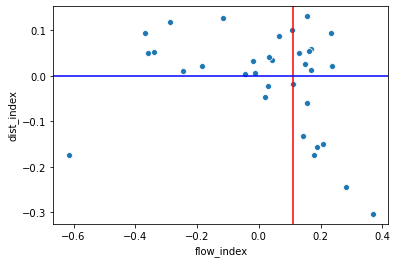

In [113]:
# 서울의 유동인구 / 물류 지표를 바탕으로 집단 나누기
sns.scatterplot(x = 'flow_index', y ='dist_index', data = seoul_index)

plt.axvline(x=seoul_flow_index, color='red')
plt.axhline(y=seoul_dist_index, color='blue')
plt.show()

#### 유동인구 감소량이 오히려 음수(= 유동인구가 2019년도에 비해 늘었다), 물류 증가량이 음수(= 물류 데이터가 오히려 감소)값을 가지는 기존 가정의 트랜드에 너무 벗어난 노이즈라 간주하고 제거

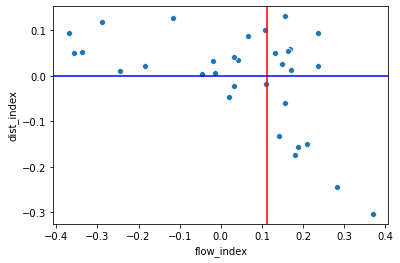

In [118]:
# 서울의 유동인구 / 물류 지표를 바탕으로 집단 나누기(동화동 제거)
sns.scatterplot(x = 'flow_index', y ='dist_index', data = seoul_index.drop('동화동', axis=0))

plt.axvline(x=seoul_flow_index, color='red')
plt.axhline(y=seoul_dist_index, color='blue')
plt.show()

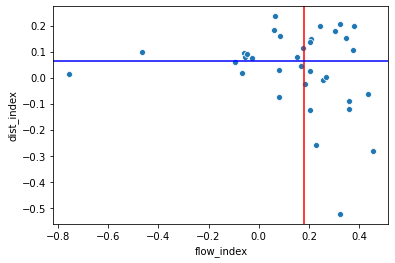

In [114]:
# 대구의 유동인구 / 물류 지표를 바탕으로 집단 나누기
sns.scatterplot(x = 'flow_index', y ='dist_index', data = daegu_index)

plt.axvline(x=daegu_flow_index, color='red')
plt.axhline(y=daegu_dist_index, color='blue')
plt.show()

### 일단 값 보정

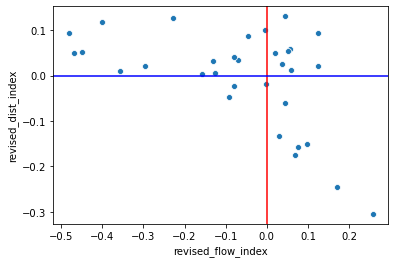

In [137]:
revise_dic_seoul = {'revised_flow_index' : seoul_index['flow_index'] - seoul_flow_index,
              'revised_dist_index' : seoul_index['dist_index'] - seoul_dist_index}

revised_seoul_index = pd.DataFrame(revise_dic_seoul)

# 서울의 유동인구 / 물류 지표를 보정한 후 집단 나누기(동화동 제거)
sns.scatterplot(x = 'revised_flow_index', y ='revised_dist_index', data = revised_seoul_index.drop('동화동', axis=0))

plt.axvline(x=0, color='red')
plt.axhline(y=0, color='blue')
plt.show()

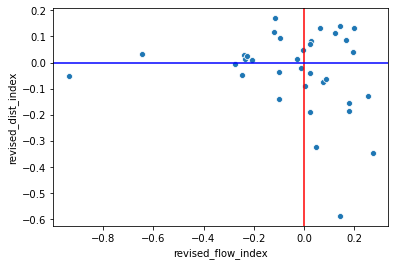

In [139]:
revise_dic_daegu = {'revised_flow_index' : daegu_index['flow_index'] - daegu_flow_index,
              'revised_dist_index' : daegu_index['dist_index'] - daegu_dist_index}

revised_daegu_index = pd.DataFrame(revise_dic_daegu)

# 대구의 유동인구 / 물류 지표를 보정한 후 집단 나누기
sns.scatterplot(x = 'revised_flow_index', y ='revised_dist_index', data = revised_daegu_index)

plt.axvline(x=0, color='red')
plt.axhline(y=0, color='blue')
plt.show()

In [141]:
minhyeok = revised_seoul_index[revised_seoul_index['revised_flow_index'] > 0]
minhyeok[minhyeok['revised_dist_index'] < 0]

,revised_flow_index,revised_dist_index
공릉2동,0.044233,-0.061513
광희동,0.096790,-0.151152
명동,0.258156,-0.304603
소공동,0.076191,-0.158095
을지로동,0.067559,-0.175770
필동,0.030019,-0.133385
회현동,0.171476,-0.244473


In [143]:
minhyeok[minhyeok['revised_dist_index'] > 0]

,revised_flow_index,revised_dist_index
상계10동,0.056649,0.057686
장충동,0.123546,0.094008
중계1동,0.045264,0.130131
중계2.3동,0.057576,0.011257
중림동,0.051516,0.053813
청구동,0.036919,0.025674
하계1동,0.124491,0.020312
하계2동,0.018833,0.049521


In [144]:
minhyeok = revised_daegu_index[revised_daegu_index['revised_flow_index'] > 0]
minhyeok[minhyeok['revised_dist_index'] < 0]

,revised_flow_index,revised_dist_index
HDNG_NM,,
남산1동,0.074920,-0.076527
남산2동,0.179642,-0.184555
남산3동,0.023178,-0.191556
대신동,0.254749,-0.128332
동인동,0.177609,-0.155988
두산동,0.088016,-0.064633
만촌2동,0.025602,-0.040937
삼덕동,0.046160,-0.325889
성내1동,0.142225,-0.589229


In [145]:
minhyeok[minhyeok['revised_dist_index'] > 0]

,revised_flow_index,revised_dist_index
HDNG_NM,,
만촌1동,0.026614,0.084166
범어1동,0.125035,0.112608
범어2동,0.194278,0.041232
범어3동,0.142068,0.141284
범어4동,0.198592,0.133507
수성2.3가동,0.165692,0.087205
수성4가동,0.024167,0.069546
황금1동,0.064178,0.133175


In [150]:
sangmin = revised_seoul_index[revised_seoul_index['revised_flow_index'] < 0]
sangmin[sangmin['revised_dist_index'] < 0]

,revised_flow_index,revised_dist_index
공릉1동,-0.080875,-0.022240
동화동,-0.727562,-0.173828
상계2동,-0.092586,-0.046323
월계1동,-0.001459,-0.017666


In [151]:
sangmin[sangmin['revised_dist_index'] > 0]

,revised_flow_index,revised_dist_index
다산동,-0.450419,0.052381
상계1동,-0.069942,0.034008
상계3.4동,-0.399917,0.118011
상계5동,-0.356782,0.009649
상계6.7동,-0.124889,0.004950
상계8동,-0.469543,0.048404
상계9동,-0.045464,0.087817
신당동,-0.157375,0.004184
약수동,-0.229071,0.126992
월계2동,-0.295100,0.021044


In [152]:
sangmin = revised_daegu_index[revised_daegu_index['revised_flow_index'] < 0]
sangmin[sangmin['revised_dist_index'] < 0]

,revised_flow_index,revised_dist_index
HDNG_NM,,
대봉1동,-0.097762,-0.037861
상동,-0.010626,-0.022211
중동,-0.274668,-0.007558
지산1동,-0.247777,-0.046640
지산2동,-0.936420,-0.052240
황금2동,-0.099449,-0.141778


In [153]:
sangmin[sangmin['revised_dist_index'] > 0]

,revised_flow_index,revised_dist_index
HDNG_NM,,
고산1동,-0.237274,0.027643
고산2동,-0.118873,0.115837
고산3동,-0.235488,0.014826
남산4동,-0.227541,0.024583
대봉2동,-0.097547,0.094575
만촌3동,-0.115989,0.169513
범물1동,-0.205368,0.008164
범물2동,-0.644719,0.032789
수성1가동,-0.005254,0.048735
